**The BACH motif**

On the motif:

>One of the most frequently occurring examples of a musical cryptogram, the motif has been used by countless composers, especially after the Bach Revival in the first half of the 19th century.


Use by other composers:

>In a comprehensive study published in the catalogue for the 1985 exhibition "300 Jahre Johann Sebastian Bach" ("300 years of Johann Sebastian Bach") in Stuttgart, Germany, Ulrich Prinz lists 409 works by 330 composers from the 17th to the 20th century using the BACH motif


https://en.wikipedia.org/wiki/BACH_motif

In [1]:
from music21 import *

bach_motif = ['B-', 'A', 'C', 'B']
bwv309 = corpus.parse('bach/bwv309')

Check if `obj` is a note.Note object.

If so, check that note.Note.name == note_name

Finally, return note.Note.name if both statements are True

In [2]:
def check_note(obj, note_name):
    
    if type(obj) != note.Note:
        return False
    if obj.name != note_name:
        return False
    return obj.name

Get successive notes from `stream_object`, inclusive of starting point `index`.

In [3]:
def get_successive_notes(stream_object, index, endpoint):
    
    successive_notes = stream_object[index-1:index+endpoint]
    
    return [n.name for n in successive_notes]

It appears that this method is limited to finding only those motifs that don't cross a barline.

In [4]:
def find_BACH(score):
    score_parts = score.getElementsByClass('Part')
    for p in score_parts:
        part_measures = p.getElementsByClass('Measure')
        for m in part_measures:
            measure_notes = m.getElementsByClass('Note')
            for n in measure_notes:
                if check_note(n, 'B-'):
                    ix = measure_notes.index
                    successiveNotes = get_successive_notes(measure_notes, ix, 4)
                    if successiveNotes == bach_motif:
                        return score.metadata.title, m, successiveNotes

In [5]:
def find_motif_in_chorales():
    motifs = []
    for chorale in corpus.chorales.Iterator():
        motif = find_BACH(chorale)
        if motif:
            motifs.append(motif)
            
    return motifs

In [6]:
motifs = find_motif_in_chorales()

In [7]:
print('Found {} BACH motifs in 406 chorales.'.format(len(motifs)))
print('\n')

for motif in motifs:
    number = motif[1].measureNumber
    print('The BACH motif can be found in measure {} of {}.'.format(number, motif[0]))

Found 2 BACH motifs in 406 chorales.


The BACH motif can be found in measure 13 of Es stehn vor Gottes Throne.
The BACH motif can be found in measure 13 of Nun lob', mein Seel, den Herren.


Es stehn vor Gottes Throne


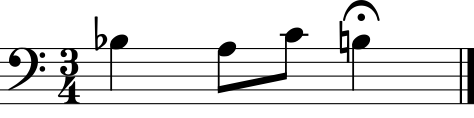

In [8]:
print(motifs[0][0])
motifs[0][1].show()

In [9]:
motifs[0][1].show('midi')

Nun lob', mein Seel, den Herren


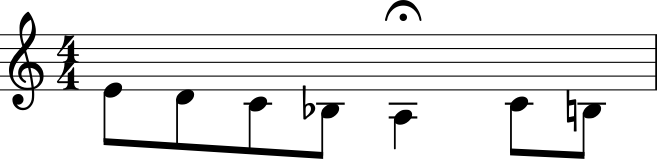

In [10]:
print(motifs[1][0])
motifs[1][1].show()

In [11]:
motifs[1][1].show('midi')

Here is an attempt to rewrite the function to find motifs across barlines by utilizing `.flat`

Instead, it finds nothing :(

In [12]:
def find_all_motifs(chorale):
    for part in chorale.parts:
        for n in part.flat.notes:
            if check_note(n, 'B-'):
#                 ix = part.flat.index(n)
                ix = part.flat.notes.index
                try:
                    successiveNotes = get_successive_notes(part.flat.notes, ix, 4)
                    if successiveNotes == bach_motif:
                        print(successiveNotes)
                except AttributeError:
                    continue
                    

find_all_motifs(bwv309)